Daniel Felipe Tamayo Cortes      1214747121


In [48]:
print("hello")

hello


## Punto 4

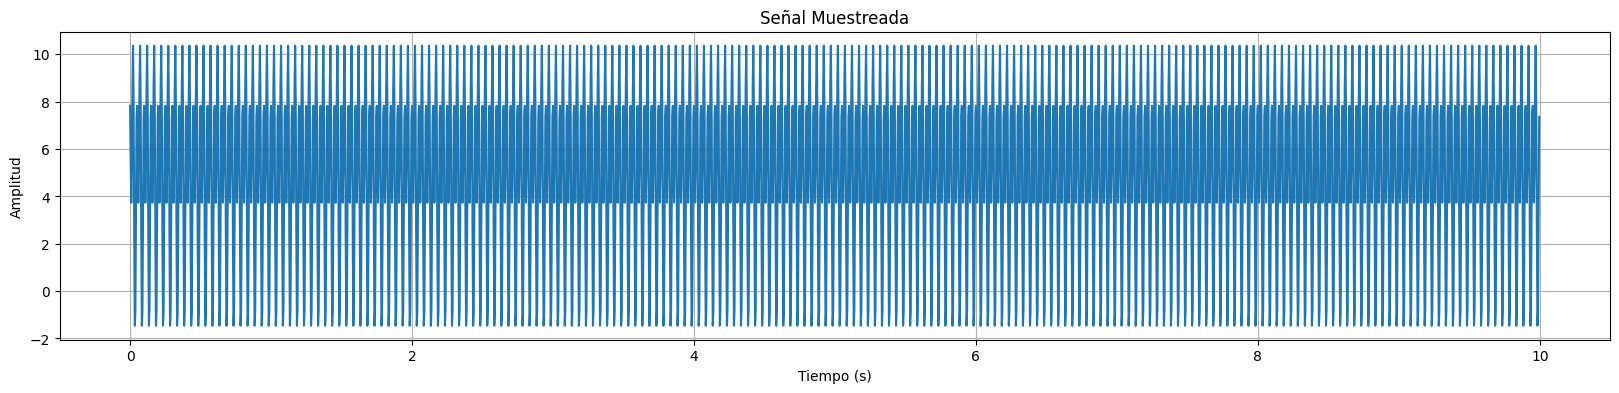

In [49]:
import numpy as np
import matplotlib.pyplot as plt


t_final = 10  # Duración de la señal
a=1
k = 2*a+1 

# Tomando el teorema de muestreo nyquist, la frecuencia de muestreo debe ser mayor a la frecuencia de la señal
# se observa una frecuencia de 40 Hz en el primer término (2*pi*40 = W = 80 --> 40 = f )
# por lo cuál se toma el doble de esta frecuencia, es decir , 80 Hz

fs = 40*2
f_s =  3*fs  # Frecuencia de muestreo empleada para mejorar la resolución, arbitrariamente escogí un factor de 3 veces la frecuencia mínima hallada

t = np.arange(0, t_final, 1/f_s)

x = 4*np.cos(80*np.pi*t + np.pi/4) + k*np.sin(40*np.pi*t) + 5

plt.figure(figsize=(20, 4))
plt.plot(t,x)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Muestreada')
plt.grid(True)
plt.show()

## Punto 5

In [35]:
def welch_periodogram(x, M, S, window='hamming'):


  N = len(x)  # Longitud de la señal
  K = int(np.floor((N - M) / S) + 1)  # Número de segmentos
  w = np.hanning(M) if window == 'hamming' else np.ones(M)  # Ventana
  W = np.sum(w**2)  # Normalización de la ventana

  Pxx = np.zeros(int(M/2))
  for k in range(K):
    xk = x[k*S:k*S+M] * w
    Xk = np.fft.fft(xk)
    Pk = np.abs(Xk[:int(M/2)])**2 / W  # **C) Periodograma modificado**
    Pxx += Pk

  Pxx /= K  # **D) Promediar los periodogramas**
  f = np.fft.fftfreq(M, 1/M)[:int(M/2)]

  return f, Pxx

## Punto 6

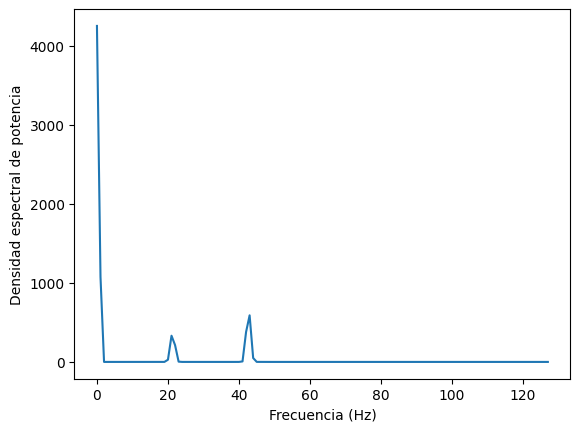

In [ ]:

# Calcular el periodograma de Welch
f, Pxx = welch_periodogram(x, 40, 15)

# Graficar el espectro
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.show()

## punto 7

In [ ]:
from scipy import signal

fs = 100  # Frecuencia de muestreo
fc1  = 5    #corte pasa altas
fc2 = 50    #corte pasabajas
numtaps = orden = 30+1  

nyquist = fs*2 # frecuencia de nyquist
wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas
wn_hp = 5/nyquist #frecuencia de corte normalizada respecto nyquist para pasa altas


# REQUIERO QUE ATENUE 10 VECES, entonces: 
AtendB = -21 # para regtangular
Rln =1/( 10**(AtendB/ 20))

AtendB = -53 # para Hamming
Rln2 =1/( 10**(AtendB/ 20))


# Pasa altas, rectangular
b_hp_rect = signal.firwin(numtaps, wn_hp, pass_zero=False)

# Pasa bajas, Hamming
b_lp_hamming = signal.firwin(numtaps, wn_lp, window='hamming')

print(Rln, Rln2)

11.220184543019634 446.6835921509631


In [46]:
# Respuesta en frecuencia del filtro pasa altas rectangular
w_hp_rect, h_hp_rect = signal.freqz(b_hp_rect)

# Respuesta en frecuencia del filtro pasa bajas Hamming
w_lp_hamming, h_lp_hamming = signal.freqz(b_lp_hamming)

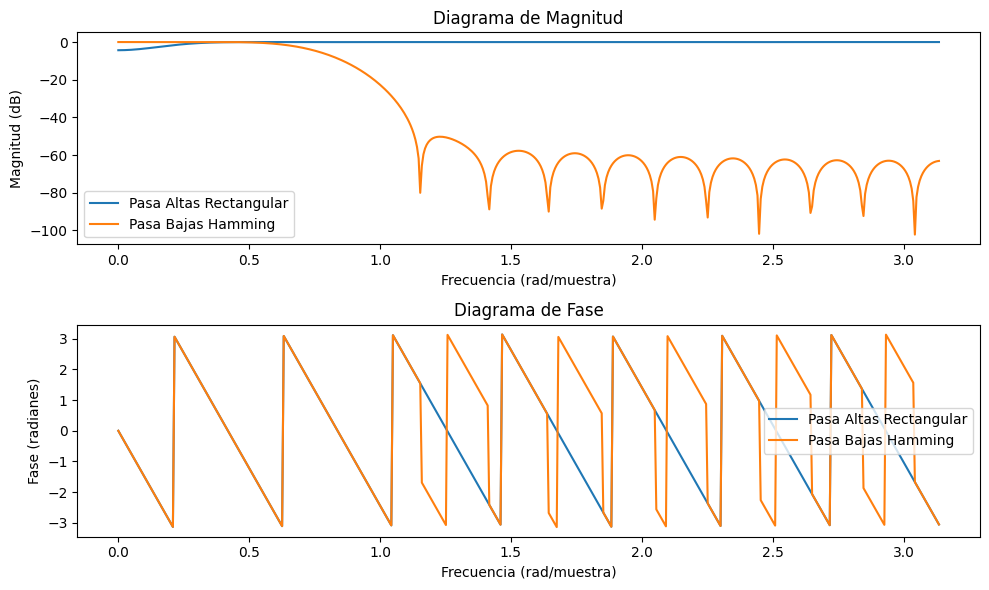

In [47]:
# Graficando la magnitud
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w_hp_rect, 20*np.log10(abs(h_hp_rect)), label='Pasa Altas Rectangular')
plt.plot(w_lp_hamming, 20*np.log10(abs(h_lp_hamming)), label='Pasa Bajas Hamming')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Magnitud')
plt.legend()

# Graficando la fase
plt.subplot(2, 1, 2)
plt.plot(w_hp_rect, np.angle(h_hp_rect), label='Pasa Altas Rectangular')
plt.plot(w_lp_hamming, np.angle(h_lp_hamming), label='Pasa Bajas Hamming')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.title('Diagrama de Fase')
plt.legend()

plt.tight_layout()
plt.show()